## Descarga y formatting del CSV de los datos

In [ ]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-03-01 15:59:27--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [             <=>    ]  52.85M  20.7MB/s    in 2.6s    

2024-03-01 15:59:30 (20.7 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [1]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [ ]:
data = pd.read_csv("airbnb-listings.csv", sep = ';')
data = data.dropna(subset=['Price'])
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17823671,https://www.airbnb.com/rooms/17823671,20170407214119,2017-04-08,Room in beautiful flat in Madrid centre!! SC8_1_2,Great room with large bed and two windows,Amazing 12 bedroom flat with 3 complete bathro...,Great room with large bed and two windows Amaz...,none,"The "" Barrio de las Letras "" is one of the mos...",...,NaN,NaN,NaN,NaN,NaN,strict,20,NaN,"40.41487093316894,-3.6965780975998435","Host Has Profile Pic,Host Identity Verified,Re..."
1,17309526,https://www.airbnb.com/rooms/17309526,20170407214050,2017-04-08,Double room in Gracia/Whole Apartment,Double room in Gracia - Habitación doble en Gr...,NaN,Double room in Gracia - Habitación doble en Gr...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"41.40132396962952,2.163712769014997","Host Has Profile Pic,Requires License"
2,801113,https://www.airbnb.com/rooms/801113,20170407214119,2017-04-08,DOUBLE ROOM WITH PRIVATE BATHROOM IN LA LATINA,Bright and spacious double room and bathroom f...,Spacious double room with private bathroom and...,Bright and spacious double room and bathroom f...,none,".Safety neighborhood with all the amenities, g...",...,9.0,10.0,9.0,NaN,NaN,moderate,1,3.15,"40.40860126037668,-3.7145957909729637","Host Has Profile Pic,Is Location Exact,Require..."
3,7357466,https://www.airbnb.com/rooms/7357466,20170407214119,2017-04-08,Alquiler habitación mes de agosto,"Hola, somos una familia de 5 amigos que vivímo...","La habitación que alquilamos es amplia, lumino...","Hola, somos una familia de 5 amigos que vivímo...",none,El piso es muy amplio y las zonas comunes dan ...,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43408638806261,-3.654979849617808","Host Has Profile Pic,Host Identity Verified,Re..."
4,17050866,https://www.airbnb.com/rooms/17050866,20170407214119,2017-04-08,Habitacion a solo 3 min de atocha,Nuestro Habitacion esta hubicada en centro de...,NaN,Nuestro Habitacion esta hubicada en centro de...,none,Es un barrio céntrico de madrid . Donde hay mu...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.71,"40.44181649452356,-3.6451428471469227","Host Has Profile Pic,Requires License"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,16231125,https://www.airbnb.com/rooms/16231125,20170407214119,2017-04-08,"Piso en en centro de Madrid,Quevedo","Piso de 3 habitaciones, un salón, un baño y un...",NaN,"Piso de 3 habitaciones, un salón, un baño y un...",none,Está muy bien comunicado y muy céntrico. Ademá...,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"40.4348724447834,-3.707547039320753","Host Has Profile Pic,Requires License"
13997,4741021,https://www.airbnb.com/rooms/4741021,20170407214119,2017-04-08,"OLAVIDE IV, 3ºD, Friendly Rentals",The apartment is in a characteristic building ...,This lovely apartment is one of several we can...,The apartment is in a characteristic building ...,none,This very safe residential district is surroun...,...,8.0,NaN,NaN,NaN,NaN,strict,145,0.17,"40.43613375660163,-3.7027578557736502","Host Has Profile Pic,Is Location Exact,Require..."
13998,5803594,https://www.airbnb.com/rooms/5803594,20170407214119,2017-04-08,Habitación pequeña cómoda amena tranquila.,cocina para utilizar para comidas muy básicas ...,"HABITACIÓN privada pequeña pero cómoda,apartam...",cocina para utilizar para comidas muy básicas ...,none,Barrio de Madrid Ubicado cerca plaza de toros...,...,9.0,8.0,9.0,NaN,NaN,strict,1,2.10,"40.423445712695965,-3.645238780837596","Host Has Profile Pic,Requires License"
13999,16025541,https://www.airbnb.com/rooms/16025541,20170407214119,2017-04-08,New reformed apartment. Everything new!!!!,Outside vieuw without noise. Ideal for two per...,NaN,Outside vieuw without noise. Ideal for two per.

In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

# El proyecto lo realizaré unicamente para la ciudad de Madrid, por lo que filtraré el dataset.

In [ ]:
# Vemos que City tiene 6 nulos.
data['City'].isna().value_counts()

False    13984
True         6
Name: City, dtype: int64

In [ ]:
# Vemos como los 6 NAs son de madrid.

na_values = data.loc[data['City'].isna(), ['City', 'Neighbourhood','Neighbourhood Cleansed']]
na_values

,City,Neighbourhood,Neighbourhood Cleansed
1602,NaN,Arapiles,Vallehermoso
2208,NaN,NaN,Ciudad Universitaria
2244,NaN,NaN,Ciudad Universitaria
4434,NaN,NaN,Ciudad Universitaria
8840,NaN,NaN,Ciudad Universitaria
10882,NaN,Cortes,Cortes


In [ ]:
# Convierto los nulos a Madrid.

data['City'] = data['City'].fillna('Madrid')
data['City'].isna().sum()

0

In [ ]:
data['City'].unique()

array(['Madrid', 'Barcelona', 'Madrid, Comunidad de Madrid, ES', '马德里',
       'Santa Margalida', 'Calvià', 'Valldemossa', 'Palma',
       'Maioris Decima', 'Caimari', 'Deià', 'Campos',
       'Santa Maria del Camí', 'Llucmajor', 'Palma de Mallorca',
       'Alcúdia', 'Illetes', 'Motilla del Palancar', 'Pozuelo de Alarcón',
       'las matas  madrid', 'Sa Pobla', 'Can Pastilla', 'Selva',
       'Algaida', 'madrid', 'La Puebla', 'Pollença', 'Font de Sa Cala',
       'Sineu', 'Sóller', 'Rotes Velles', 'Muro', 'Illes Balears',
       'Sant Llorenç des Cardassar', 'Costitx', 'MADRID', 'Santanyí',
       'Balearic Islands', 'Cala Ratjada', 'Búger', 'Inca', 'Andratx',
       'Muro (Mallorca)', 'Mal Pas-Bon Aire', 'Cala Magrana',
       'Binissalem', 'Pollensa', 'Madri', 'Ventas', 'Alaró', 'Manacor',
       'Son Moll', 'Felanitx', 'Madrid, Vallecas (Fontarrón)',
       'Sant Joan', 'Lloret de Vistalegre', 'Cala Pi',
       'Vilafranca de Bonany', 'Cala Anguila-Cala Mendia',
       'Colonia de

In [ ]:
# Realizo un filtrado por Madrid y sus diferentes tipografías y elimino la columna City. (He traducido las letras chinas en Google Traductor y resulta que significa Madrid)

madrid_df = data[data['City'].str.contains('madrid|Madrid|马德里|Pozuelo|馬德里|Boadilla|Delicias|las matas|Madid|La Elipa|Aravaca|Ventas|Chueca|de Henares|Vallecas|MADRID|Centro|verde bajo|Aravaca', case=False)]

madrid_df = madrid_df.drop(['City'], axis=1)

In [ ]:
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13314 entries, 0 to 13999
Data columns (total 88 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              13314 non-null  int64  
 1   Listing Url                     13314 non-null  object 
 2   Scrape ID                       13314 non-null  int64  
 3   Last Scraped                    13314 non-null  object 
 4   Name                            13314 non-null  object 
 5   Summary                         12829 non-null  object 
 6   Space                           9689 non-null   object 
 7   Description                     13308 non-null  object 
 8   Experiences Offered             13314 non-null  object 
 9   Neighborhood Overview           8303 non-null   object 
 10  Notes                           5031 non-null   object 
 11  Transit                         8257 non-null   object 
 12  Access                          

# Aqui selecciono las caracteristicas con las que voy a realizar el análisis, las cuales las he seleccionado considerando la practica de ML del antiguo módulo.
# Las demas características, según diferentes analisis he dedicido no incluirlas.

In [ ]:
madrid_df = madrid_df[['ID','Thumbnail Url','Neighbourhood Cleansed','Property Type','Room Type','Accommodates','Bathrooms'
                      ,'Bedrooms','Beds','Bed Type','Amenities','Price','Security Deposit','Cleaning Fee','Guests Included','Extra People','Minimum Nights'
                      ,'Maximum Nights','Number of Reviews','Cancellation Policy','Host Total Listings Count']]

In [ ]:
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13314 entries, 0 to 13999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         13314 non-null  int64  
 1   Thumbnail Url              10831 non-null  object 
 2   Neighbourhood Cleansed     13314 non-null  object 
 3   Property Type              13314 non-null  object 
 4   Room Type                  13314 non-null  object 
 5   Accommodates               13314 non-null  int64  
 6   Bathrooms                  13266 non-null  float64
 7   Bedrooms                   13291 non-null  float64
 8   Beds                       13266 non-null  float64
 9   Bed Type                   13314 non-null  object 
 10  Amenities                  13155 non-null  object 
 11  Price                      13314 non-null  float64
 12  Security Deposit           5648 non-null   float64
 13  Cleaning Fee               7845 non-null   flo

### Procedo a eliminar los nulos, considerando que representan un % (cálculo realizado en el proyecto de ML) muy pequeño para el total del dataset.

In [ ]:
madrid_df.dropna(subset=['Host Total Listings Count', 'Bathrooms', 'Bedrooms', 'Beds'], inplace=True)
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13228 entries, 0 to 13999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         13228 non-null  int64  
 1   Thumbnail Url              10762 non-null  object 
 2   Neighbourhood Cleansed     13228 non-null  object 
 3   Property Type              13228 non-null  object 
 4   Room Type                  13228 non-null  object 
 5   Accommodates               13228 non-null  int64  
 6   Bathrooms                  13228 non-null  float64
 7   Bedrooms                   13228 non-null  float64
 8   Beds                       13228 non-null  float64
 9   Bed Type                   13228 non-null  object 
 10  Amenities                  13091 non-null  object 
 11  Price                      13228 non-null  float64
 12  Security Deposit           5625 non-null   float64
 13  Cleaning Fee               7813 non-null   flo

## Descarga de imágenes

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=np.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Normalización y conversión en el rango [0, 1]

In [ ]:
images, idxs = download_images(madrid_df['Thumbnail Url'], max_imgs=4000)
images = images.astype("float32") / 255.
images.shape

100%|██████████| 4000/4000 [13:15<00:00,  5.03it/s]


(2512, 224, 224, 3)

Filtrado acorde en los demás datos

In [ ]:
filtered_data = madrid_df.iloc[idxs]
filtered_data

,ID,Thumbnail Url,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,...,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy,Host Total Listings Count
0,17823671,https://a0.muscache.com/im/pictures/5b9ec2c3-f...,Cortes,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,35.0,200.0,30.0,1,0,7,1125,0,strict,20.0
2,801113,https://a0.muscache.com/im/pictures/11494964/3...,Palacio,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,...,34.0,95.0,15.0,1,10,3,60,163,moderate,1.0
3,7357466,https://a0.muscache.com/im/pictures/93360748/6...,Quintana,Apartment,Private room,1,2.0,1.0,1.0,Real Bed,...,30.0,NaN,NaN,1,0,1,1125,0,flexible,1.0
4,17050866,https://a0.muscache.com/im/pictures/013ac53f-8...,Concepción,House,Private room,1,1.0,1.0,1.0,Real Bed,...,20.0,NaN,NaN,1,0,1,1125,1,flexible,0.0
5,6987048,https://a0.muscache.com/im/pictures/92181730/6...,Marroquina,Apartment,Private room,3,1.5,1.0,3.0,Real Bed,...,30.0,200.0,25.0,1,25,1,100,1,strict,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,15763247,https://a0.muscache.com/im/pictures/a320bc18-9...,Argüelles,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,...,50.0,NaN,15.0,2,10,1,15,20,moderate,1.0
4219,18090848,https://a0.muscache.com/im/pictures/1ee001ba-1...,Valdezarza,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,...,20.0,100.0,10.0,1,0,1,1125,0,moderate,1.0
4223,15815305,https://a0.muscache.com/im/pictures/2d1f4f03-b...,Delicias,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,...,26.0,NaN,NaN,1,18,2,1125,16,moderate,1.0
4225,12582411,https://a0.muscache.com/im/pictures/4fb3a8ce-4...,Justicia,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,56.0,150.0,20.0,1,0,2,1125,4,moderate,1.0


In [ ]:
# Ahora elimino ID y Thumbnail Url
filtered_data = filtered_data.drop(['ID','Thumbnail Url'], axis=1)
filtered_data

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy,Host Total Listings Count
0,Cortes,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Elevator in build...",35.0,200.0,30.0,1,0,7,1125,0,strict,20.0
2,Palacio,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",34.0,95.0,15.0,1,10,3,60,163,moderate,1.0
3,Quintana,Apartment,Private room,1,2.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Buzz...",30.0,NaN,NaN,1,0,1,1125,0,flexible,1.0
4,Concepción,House,Private room,1,1.0,1.0,1.0,Real Bed,translation missing: en.hosting_amenity_49,20.0,NaN,NaN,1,0,1,1125,1,flexible,0.0
5,Marroquina,Apartment,Private room,3,1.5,1.0,3.0,Real Bed,"Wheelchair accessible,Kitchen,Smoking allowed,...",30.0,200.0,25.0,1,25,1,100,1,strict,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,Argüelles,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",50.0,NaN,15.0,2,10,1,15,20,moderate,1.0
4219,Valdezarza,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",20.0,100.0,10.0,1,0,1,1125,0,moderate,1.0
4223,Delicias,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"Internet,Wireless Internet,Air conditioning,Sm...",26.0,NaN,NaN,1,18,2,1125,16,moderate,1.0
4225,Justicia,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Elevator in build...",56.0,150.0,20.0,1,0,2,1125,4,moderate,1.0


## Guardado de los datos para posterior uso/selección

In [ ]:
np.save('images2512.npy', images)
filtered_data.to_csv('filtered_data2512.csv', sep=';', index=False)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp images2512.npy /content/drive/MyDrive/images_2512.npy
!cp filtered_data2512.csv /content/drive/MyDrive/filtered_data2512.csv

!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 721K Mar  1 16:25 filtered_data2512.csv
-rw-r--r-- 1 root root 1.5G Mar  1 16:25 images2512.npy


In [3]:
import numpy as np
import pandas as pd

# Ejecuto los datos tabulares
madrid_data = pd.read_csv("/content/drive/MyDrive/filtered_data2512.csv", sep=';')

In [ ]:
madrid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Neighbourhood Cleansed     2512 non-null   object 
 1   Property Type              2512 non-null   object 
 2   Room Type                  2512 non-null   object 
 3   Accommodates               2512 non-null   int64  
 4   Bathrooms                  2512 non-null   float64
 5   Bedrooms                   2512 non-null   float64
 6   Beds                       2512 non-null   float64
 7   Bed Type                   2512 non-null   object 
 8   Amenities                  2489 non-null   object 
 9   Price                      2512 non-null   float64
 10  Security Deposit           1066 non-null   float64
 11  Cleaning Fee               1476 non-null   float64
 12  Guests Included            2512 non-null   int64  
 13  Extra People               2512 non-null   int64

## Convertimos las variables categoricas con Pandas (get_dummies). Realizo aqui la conversión para no tener problemas con la magnitud del dataset, ya que a la hora de dividir en train/test y ser un dataset pequeño, no quedaban equilibrabas las características.

In [4]:
# Get-dummies

col_convert = [ 'Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

dum_mad = pd.get_dummies(madrid_data[col_convert])

madrid_data = pd.concat([madrid_data, dum_mad], axis=1)

# Elimina las columnas originales categóricas si así lo deseas
madrid_data.drop(columns=col_convert, inplace=True)

madrid_data.shape

(2512, 162)

# Dividimos el dataset madrid_data

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(madrid_data.drop(columns=['Price']), madrid_data['Price'], test_size=0.2, shuffle=True, random_state=0)

# Dividir el conjunto de entrenamiento en conjuntos de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print("Dimensiones del conjunto de entrenamiento (X):", x_train.shape)
print("Dimensiones del conjunto de validación (X):", x_val.shape)
print("Dimensiones del conjunto de prueba (X):", x_test.shape)
print("Dimensiones del conjunto de entrenamiento (Y):", y_train.shape)
print("Dimensiones del conjunto de validación (Y):", y_val.shape)
print("Dimensiones del conjunto de prueba (Y):", y_test.shape)

Dimensiones del conjunto de entrenamiento (X): (1808, 161)
Dimensiones del conjunto de validación (X): (201, 161)
Dimensiones del conjunto de prueba (X): (503, 161)
Dimensiones del conjunto de entrenamiento (Y): (1808,)
Dimensiones del conjunto de validación (Y): (201,)
Dimensiones del conjunto de prueba (Y): (503,)


### Imputación y normalización de los datos.

In [6]:
# Considero realizar un conteo de Amenities evitando contar las 'translation missing', dejar los valores nulos en 0 y elimino la columna Amenities
def contador(x):
    if pd.notna(x):
        return len([amenity for amenity in str(x).split(',') if 'translation missing' not in str(amenity)])
    else:
        return 0

# Aplico la funcion a la columna Amenities y creo Amenities Sum
x_train['Amenities Sum'] = x_train['Amenities'].apply(contador).astype(int)
x_test['Amenities Sum'] = x_test['Amenities'].apply(contador).astype(int)
x_val['Amenities Sum'] = x_val['Amenities'].apply(contador).astype(int)

# Elimino Amenities
x_train = x_train.drop('Amenities', axis=1)
x_test = x_test.drop('Amenities', axis=1)
x_val = x_val.drop('Amenities', axis=1)

# Convierto los nulos (Según Airbnb la tasa de limpieza la puede exigir el HOST por lo que a los nulos les asigno 0 )
x_train['Cleaning Fee'] = x_train['Cleaning Fee'].fillna(0)
x_test['Cleaning Fee'] = x_test['Cleaning Fee'].fillna(0)
x_val['Cleaning Fee'] = x_val['Cleaning Fee'].fillna(0)

# Convierto los nulos (Según Airbnb la fianza la puede exigir el HOST por lo que a los nulos les asigno 0 )
x_train['Security Deposit'] = x_train['Security Deposit'].fillna(0)
x_test['Security Deposit'] = x_test['Security Deposit'].fillna(0)
x_val['Security Deposit'] = x_val['Security Deposit'].fillna(0)

# Convierto los datos a float64
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_val = x_val.astype('float64')


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos con MinMaxScaler
scaler_x = MinMaxScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_val_scaled = scaler_x.transform(x_val)
x_test_scaled = scaler_x.transform(x_test)

# Reshape para que sean compatibles con MinMaxScaler
scaler_y = MinMaxScaler()
y_train_reshaped = y_train.values.reshape(-1, 1)
y_val_reshaped = y_val.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Normalizamos la variable objetivo
y_train_scaled = scaler_y.fit_transform(y_train_reshaped).reshape(-1)
y_val_scaled = scaler_y.transform(y_val_reshaped).reshape(-1)
y_test_scaled = scaler_y.transform(y_test_reshaped).reshape(-1)


# Creo la red neuronal para procesar los datos tabulares.

[INFO]: Entrenando red neuronal...
Epoch 1/50
15/15 [==============================] - 3s 28ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epo

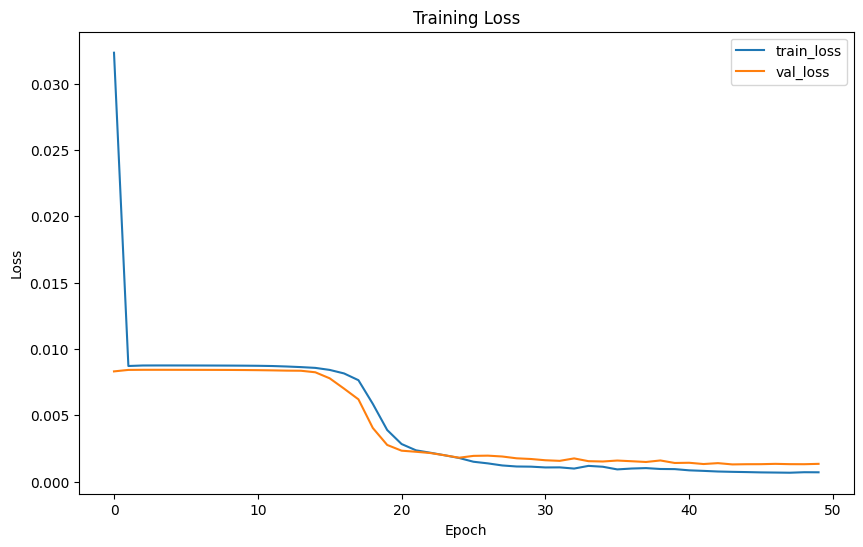

In [8]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

# Hiperparámetros probados
learning_rate = 0.01
num_epochs = 50
batch_size = 128

# Implementamos la red
model_tab = Sequential()
model_tab.add(Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model_tab.add(Dense(1, activation="sigmoid"))

# Compilamos y entrenamos el modelo Adam
print("[INFO]: Entrenando red neuronal...")
model_tab.compile(loss="mean_squared_error", optimizer=Adam(learning_rate), metrics=["mean_squared_error"])

# Entreno la solución
H = model_tab.fit(x_train_scaled, y_train_scaled, validation_data=(x_val_scaled, y_val_scaled), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
_, mse = model_tab.evaluate(x_test_scaled, y_test_scaled, batch_size=batch_size)
print(f"Mean Squared Error en Test: {mse}")

# Predecir los precios
train_pred_scaled = model_tab.predict(x_train_scaled, batch_size=batch_size)
val_pred_scaled = model_tab.predict(x_val_scaled, batch_size=batch_size)
test_pred_scaled = model_tab.predict(x_test_scaled, batch_size=batch_size)

# Invierto la escala de predicción para obtener los precios reales
train_pred = scaler_y.inverse_transform(train_pred_scaled)
val_pred = scaler_y.inverse_transform(val_pred_scaled)
test_pred = scaler_y.inverse_transform(test_pred_scaled)

# Calculo el error RMSE para cada conjunto de datos
train_rmse = math.sqrt(mean_squared_error(y_train, train_pred))
val_rmse = math.sqrt(mean_squared_error(y_val, val_pred))
test_rmse = math.sqrt(mean_squared_error(y_test, test_pred))
print(f'Train Score: {train_rmse:.2f} RMSE')
print(f'Validation Score: {val_rmse:.2f} RMSE')
print(f'Test Score: {test_rmse:.2f} RMSE')

# Gráfica de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['val_loss'], label='val_loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




## Luego de realizar muchas pruebas con los hiperparametros, encuentro que con estos valores, logramos que la red aprenda y converga de manera consistente con los datos.

In [9]:
# Reajusto los arrays de numpy para tener una columna adicional
y_train_scaled_reshaped = y_train_scaled.reshape(-1, 1)
y_test_scaled_reshaped = y_test_scaled.reshape(-1, 1)
y_val_scaled_reshaped = y_val_scaled.reshape(-1, 1)

# Verifico las formas después de reajustar
print("Shape del array de y_train_scaled_reshaped:", y_train_scaled_reshaped.shape)
print("Shape del array de y_test_scaled_reshaped:", y_test_scaled_reshaped.shape)
print("Shape del array de y_val_scaled_reshaped:", y_val_scaled_reshaped.shape)

Shape del array de y_train_scaled_reshaped: (1808, 1)
Shape del array de y_test_scaled_reshaped: (503, 1)
Shape del array de y_val_scaled_reshaped: (201, 1)


# A partir de aqui creo la red convolucional.

CON ESTAS LINEAS DE CODIGO, LO QUE REALIZO ES DIVIDIR EL DATASET DE IMAGENES EN TRAIN, VAL Y TEST Y LOS DESCARGO POR SEPARADO, PARA LUEGO EJECUTARLO POR SEPARADO Y QUE NO ME SATURE LA RAM DEL COLAB.

In [10]:
# Cargamos las imagenes
#madrid_imgs = np.load("/content/drive/MyDrive/images_2512.npy")
#madrid_imgs.shape

# Aplicamos el split
#x_train_im, x_test_im = train_test_split(madrid_imgs, test_size=0.2, shuffle=True, random_state=0)

#np.save('x_test_im.npy', x_test_im)
#!cp x_test_im.npy /content/drive/MyDrive/x_test_img.npy

# Dividimos el conjunto de training en training y validation
#x_train_im, x_val_im = train_test_split(x_train_im, test_size=0.1, random_state=42)

#np.save('x_train_im.npy', x_train_im)
#np.save('x_val_im.npy', x_val_im)
#!cp x_train_im.npy /content/drive/MyDrive/x_train_img.npy
#!cp x_val_im.npy /content/drive/MyDrive/x_val_img.npy


x_train_im = np.load("/content/drive/MyDrive/x_train_img2512.npy")
x_test_im = np.load("/content/drive/MyDrive/x_test_img2512.npy")
x_val_im = np.load("/content/drive/MyDrive/x_val_img2512.npy")

In [ ]:
x_train_im.shape, x_test_im.shape, x_val_im.shape

((1808, 224, 224, 3), (503, 224, 224, 3), (201, 224, 224, 3))

Normalizamos las imágenes.

In [11]:
# Centramos los datos (le restamos la media para X)
X_train_mean = np.mean(x_train_im, axis=0)
X_train_cent = x_train_im - X_train_mean

# Normalizamos (estandarizamos X)
X_train_std = np.std(x_train_im, axis=0)
X_train_norm = X_train_cent / X_train_std

In [12]:
X_test_norm = (x_test_im - X_train_mean) / X_train_std
X_val_norm = (x_val_im - X_train_mean) / X_train_std

In [13]:
# Centramos los datos (le restamos la media para Y)
y_train_mean = np.mean(y_train_scaled_reshaped, axis=0)
y_train_cent = y_train_scaled_reshaped - y_train_mean

# Normalizamos (estandarizamos Y)
y_train_std = np.std(y_train_scaled_reshaped, axis=0)
y_train_norm = y_train_cent / y_train_std

In [14]:
y_test_norm = (y_test_scaled_reshaped - y_train_mean) / y_train_std
y_val_norm = (y_val_scaled_reshaped - y_train_mean) / y_train_std

In [ ]:
X_train_norm.shape, X_val_norm.shape, X_test_norm.shape

((1808, 224, 224, 3), (201, 224, 224, 3), (503, 224, 224, 3))

In [ ]:
y_train_norm.shape, y_val_norm.shape, y_test_norm.shape

((1808, 1), (201, 1), (503, 1))

In [15]:
# Cargamos las librerias

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.applications import VGG16, ResNet50, VGG19, Xception, InceptionV3
from tensorflow.keras import optimizers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras import regularizers

# REALIZO PRUEBAS CON REDES CREADAS PARA VER RESULTADOS.

In [ ]:
# Prueba con BatchNormalization

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Definimos una segunda capa convolucional
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(16, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='mean_squared_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_squared_error'])

# Entrenamos el modelo
model.fit(X_train_norm, y_train_norm,
          batch_size=64,
          shuffle=True,
          epochs=10,
          validation_data=(X_val_norm, y_val_norm))

# Evaluamos el modelo
loss, mse = model.evaluate(X_test_norm, y_test_norm)

# Observamos el numero de parametros
model.summary()

print('Loss: %.3f' % loss)
print('MSE: %.3f' % mse)

Epoch 1/10
29/29 [==============================] - 41s 725ms/step - loss: 1.0071 - mean_squared_error: 1.0071 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 2/10
29/29 [==============================] - 13s 463ms/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 3/10
29/29 [==============================] - 13s 460ms/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 4/10
29/29 [==============================] - 13s 456ms/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 5/10
29/29 [==============================] - 13s 455ms/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 6/10
29/29 [==============================] - 13s 464ms/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 7/10
29/29 [====

In [ ]:
# Ahora pruebo con Dropout


# Probabilidad del dropout
dr = 0.25

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dr))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dr))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dr))

# Añadimos nuestro regresor
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(dr))
model.add(Dense(128, activation='relu'))
model.add(Dropout(dr))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='mean_squared_error',
              optimizer=Adam(learning_rate=0.1),
              metrics=['mean_squared_error'])

# Entrenamos el modelo
model.fit(X_train_norm, y_train_norm,
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_val_norm, y_val_norm))

# Evaluamos el modelo
loss, mse = model.evaluate(X_test_norm, y_test_norm)

print('Loss: %.3f' % loss)
print('MSE: %.3f' % mse)

Epoch 1/10
15/15 [==============================] - 70s 4s/step - loss: 1.0242 - mean_squared_error: 1.0242 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 2/10
15/15 [==============================] - 18s 1s/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 3/10
15/15 [==============================] - 18s 1s/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 4/10
15/15 [==============================] - 18s 1s/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 5/10
15/15 [==============================] - 18s 1s/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 6/10
15/15 [==============================] - 18s 1s/step - loss: 1.0000 - mean_squared_error: 1.0000 - val_loss: 0.8524 - val_mean_squared_error: 0.8524
Epoch 7/10
15/15 [======================

Luego de realizar diferentes pruebas con los hiperparámetros, no logro mejorar el resultado que se visualiza, por lo que considero avanzar para trabajar con redes pre-entrenadas.

# AHORA REALIZO PRUEBAS CON DATOS PRE-ENTRENADOS

He probado con VGG16, VGG19, ResNet50 y Xception obtuviendo siempre el mismo resultado.

In [ ]:
# construimos el modelo base
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()

83683744/83683744 [==============================] - 5s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [ ]:
# Transfer learning congelando capas

for layer in base_model.layers:
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')


# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.35)(x)
x = Dense(512, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.35)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.35)(x)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dropout(0.35)(x)
x = Dense(1, activation='sigmoid', name='predictions')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['mean_squared_error'])

# vemos la estructura del modelo
model.summary()

Capa input_3 congelada.
Capa block1_conv1 congelada.
Capa block1_conv1_bn congelada.
Capa block1_conv1_act congelada.
Capa block1_conv2 congelada.
Capa block1_conv2_bn congelada.
Capa block1_conv2_act congelada.
Capa block2_sepconv1 congelada.
Capa block2_sepconv1_bn congelada.
Capa block2_sepconv2_act congelada.
Capa block2_sepconv2 congelada.
Capa block2_sepconv2_bn congelada.
Capa conv2d_3 congelada.
Capa block2_pool congelada.
Capa batch_normalization congelada.
Capa add congelada.
Capa block3_sepconv1_act congelada.
Capa block3_sepconv1 congelada.
Capa block3_sepconv1_bn congelada.
Capa block3_sepconv2_act congelada.
Capa block3_sepconv2 congelada.
Capa block3_sepconv2_bn congelada.
Capa conv2d_4 congelada.
Capa block3_pool congelada.
Capa batch_normalization_1 congelada.
Capa add_1 congelada.
Capa block4_sepconv1_act congelada.
Capa block4_sepconv1 congelada.
Capa block4_sepconv1_bn congelada.
Capa block4_sepconv2_act congelada.
Capa block4_sepconv2 congelada.
Capa block4_sepconv

In [ ]:
# comenzamos con el entrenamiento (ya he probado con mas epocas sin lograr mejores resultados)
epochs = 15
batch_size = 128

# como entrenariamos normalmente
model.fit(X_train_norm, y_train_norm,
          batch_size=batch_size,
          validation_data=(X_val_norm, y_val_norm),
          epochs=epochs)

# Evaluamos el modelo
loss, mse = model.evaluate(X_test_norm, y_test_norm)

print('Loss: %.3f' % loss)
print('MSE: %.3f' % mse)

Epoch 1/15
15/15 [==============================] - 14s 566ms/step - loss: 2028.8376 - mean_squared_error: 1.0137 - val_loss: 1225.2751 - val_mean_squared_error: 0.8524
Epoch 2/15
15/15 [==============================] - 7s 484ms/step - loss: 409.3546 - mean_squared_error: 1.0000 - val_loss: 134.0764 - val_mean_squared_error: 0.8524
Epoch 3/15
15/15 [==============================] - 7s 438ms/step - loss: 93.8840 - mean_squared_error: 1.0000 - val_loss: 18.8965 - val_mean_squared_error: 0.8524
Epoch 4/15
15/15 [==============================] - 7s 452ms/step - loss: 20.6037 - mean_squared_error: 1.0000 - val_loss: 8.1467 - val_mean_squared_error: 0.8524
Epoch 5/15
15/15 [==============================] - 7s 487ms/step - loss: 5.4365 - mean_squared_error: 1.0000 - val_loss: 3.4071 - val_mean_squared_error: 0.8524
Epoch 6/15
15/15 [==============================] - 7s 489ms/step - loss: 1.9722 - mean_squared_error: 1.0000 - val_loss: 1.0450 - val_mean_squared_error: 0.8524
Epoch 7/15
15/

In [ ]:
# Ahora pruebo con fine tuning

# último bloque convolucional
for layer in base_model.layers:
  layer.trainable = False
  if layer.name == "block14_sepconv2_act":
    layer.trainable = True

# Última capa
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.35)(x)
x = Dense(512, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.35)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.35)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x = Dropout(0.35)(x)
x = Dense(1, activation='sigmoid', name='predictions')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['mean_squared_error'])

# vemos la nueva estructura del modelo
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

In [ ]:
# comenzamos con el entrenamiento (he logrado hasta con 50 epocas sin lograr ningun resultado considerable)
epochs = 15
batch_size = 128

# como entrenariamos normalmente
model.fit(X_train_norm, y_train_norm,
          batch_size=batch_size,
          validation_data=(X_val_norm, y_val_norm),
          epochs=epochs)

# Evaluamos el modelo
loss, mse = model.evaluate(X_test_norm, y_test_norm)

print('Loss: %.3f' % loss)
print('MSE: %.3f' % mse)


Epoch 1/15
15/15 [==============================] - 39s 1s/step - loss: 2167.8779 - mean_squared_error: 1.0205 - val_loss: 1146.9374 - val_mean_squared_error: 0.8524
Epoch 2/15
15/15 [==============================] - 9s 622ms/step - loss: 442.1245 - mean_squared_error: 1.0000 - val_loss: 98.9190 - val_mean_squared_error: 0.8524
Epoch 3/15
15/15 [==============================] - 9s 582ms/step - loss: 92.1256 - mean_squared_error: 1.0000 - val_loss: 27.3805 - val_mean_squared_error: 0.8524
Epoch 4/15
15/15 [==============================] - 9s 598ms/step - loss: 20.9319 - mean_squared_error: 1.0000 - val_loss: 8.1138 - val_mean_squared_error: 0.8524
Epoch 5/15
15/15 [==============================] - 9s 597ms/step - loss: 5.5021 - mean_squared_error: 1.0000 - val_loss: 2.8644 - val_mean_squared_error: 0.8524
Epoch 6/15
15/15 [==============================] - 9s 583ms/step - loss: 1.9969 - mean_squared_error: 1.0000 - val_loss: 1.1734 - val_mean_squared_error: 0.8524
Epoch 7/15
15/15 [

### Probamos ahora con Data Augmentation

In [ ]:
# Data augmentation + Dropout + Regularización con Lasso

print('Usando real-time data augmentation.')

datagen_train = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen_train.fit(X_train_norm)

datagen_test = ImageDataGenerator()
datagen_test.fit(X_test_norm)

# permitimos que, además de la etapa del regresor, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  layer.trainable = False
  if layer.name == "block5_conv3":
    layer.trainable = True

# Última capa del modelo
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_squared_error'])

# vemos la nueva estructura del modelo
model.summary()

Usando real-time data augmentation.
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPoolin

In [ ]:
# comenzamos con el entrenamiento
epochs = 30
batch_size = 128
train_steps_per_epoch = X_train_norm.shape[0] / batch_size
test_steps_per_epoch = X_test_norm.shape[0] / batch_size

# entrenamos con el datagenerator
H = model.fit(datagen_train.flow(X_train_norm, y_train_norm, batch_size),
                    steps_per_epoch=train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=datagen_test.flow(X_val_norm, y_val_norm, batch_size=batch_size),
                    validation_steps=test_steps_per_epoch,
                    workers=8)



Epoch 1/30
14/14 [==============================] - 37s 2s/step - loss: 7.9490 - mean_squared_error: 1.1292 - val_loss: 3.7223 - val_mean_squared_error: 0.8524
Epoch 2/30
14/14 [==============================] - 33s 1s/step - loss: 2.7452 - mean_squared_error: 1.0090 - val_loss: 1.7325 - val_mean_squared_error: 0.8524
Epoch 3/30
14/14 [==============================] - 26s 1s/step - loss: 1.5422 - mean_squared_error: 1.0023 - val_loss: 1.1460 - val_mean_squared_error: 0.8524
Epoch 4/30
14/14 [==============================] - 30s 1s/step - loss: 1.2111 - mean_squared_error: 1.0000 - val_loss: 0.9842 - val_mean_squared_error: 0.8524
Epoch 5/30
14/14 [==============================] - 27s 1s/step - loss: 1.1045 - mean_squared_error: 1.0005 - val_loss: 0.9729 - val_mean_squared_error: 0.8524
Epoch 6/30
14/14 [==============================] - 30s 2s/step - loss: 1.1281 - mean_squared_error: 0.9999 - val_loss: 0.9441 - val_mean_squared_error: 0.8524
Epoch 7/30
14/14 [======================

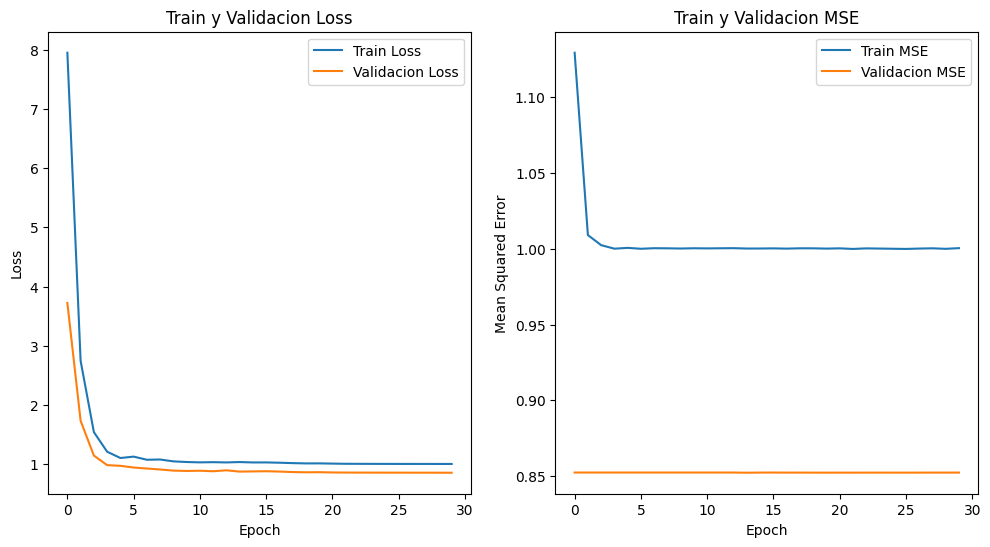

16/16 [==============================] - 2s 132ms/step - loss: 1.5080 - mean_squared_error: 1.5041
Test loss: 1.5079535245895386
Test MSE: 1.5041390657424927


In [ ]:
import matplotlib.pyplot as plt

#Obtener las métricas de pérdida y MSE
loss = H.history['loss']
val_loss = H.history['val_loss']
mse = H.history['mean_squared_error']
val_mse = H.history['val_mean_squared_error']

# Plotear la pérdida y MSE durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validacion Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train y Validacion Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mse, label='Train MSE')
plt.plot(val_mse, label='Validacion MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Train y Validacion MSE')
plt.legend()

plt.show()

# Evaluación del modelo en el conjunto de prueba
loss, mse = model.evaluate(X_test_norm, y_test_norm, verbose=1)
print('Test loss:', loss)
print('Test MSE:', mse)

## Pruebo ahora con VGG16

In [24]:
# construimos el modelo base
base_model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
# data augmentation +  Dropout + regularización con Lasso (He probado l1 Ridge y las perdidas han sido considerablemente mas elevadas,
# aunque con 50 batch size logramos estabilizar la pérdida a los mismos valores que se repiten en cada red convolucional).

print('Usando real-time data augmentation.')

datagen_train = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen_train.fit(X_train_norm)

datagen_test = ImageDataGenerator()
datagen_test.fit(X_test_norm)

# último bloque convolucional
for layer in base_model_2.layers:
  layer.trainable = False
  if layer.name == "block5_pool":
    layer.trainable = True

x = Flatten()(base_model_2.output)
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.1))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model2 = Model(base_model_2.input, x)

# compilo el modelo
model2.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['mean_squared_error'])

# vemos la nueva estructura del modelo
model2.summary()

Usando real-time data augmentation.
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPoolin

In [27]:
# comenzamos con el entrenamiento
epochs = 15
batch_size = 128
train_steps_per_epoch = X_train_norm.shape[0] / batch_size
test_steps_per_epoch = X_test_norm.shape[0] / batch_size

# entrenamos con el datagenerator
H = model2.fit(datagen_train.flow(X_train_norm, y_train_norm, batch_size),
                    steps_per_epoch=train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=datagen_test.flow(X_val_norm, y_val_norm, batch_size=batch_size),
                    validation_steps=test_steps_per_epoch,
                    workers=8)

Epoch 1/15
14/14 [==============================] - 29s 1s/step - loss: 5090.6128 - mean_squared_error: 1.0243 - val_loss: 3227.5510 - val_mean_squared_error: 0.8524
Epoch 2/15
14/14 [==============================] - 25s 1s/step - loss: 976.1795 - mean_squared_error: 1.0000 - val_loss: 311.5992 - val_mean_squared_error: 0.8524
Epoch 3/15
14/14 [==============================] - 27s 1s/step - loss: 213.5555 - mean_squared_error: 1.0000 - val_loss: 64.8022 - val_mean_squared_error: 0.8524
Epoch 4/15
14/14 [==============================] - 26s 1s/step - loss: 47.0602 - mean_squared_error: 1.0000 - val_loss: 18.3100 - val_mean_squared_error: 0.8524
Epoch 5/15
14/14 [==============================] - 26s 1s/step - loss: 11.2504 - mean_squared_error: 1.0000 - val_loss: 4.5904 - val_mean_squared_error: 0.8524
Epoch 6/15
14/14 [==============================] - 27s 1s/step - loss: 3.2874 - mean_squared_error: 1.0000 - val_loss: 1.8441 - val_mean_squared_error: 0.8524
Epoch 7/15
14/14 [======

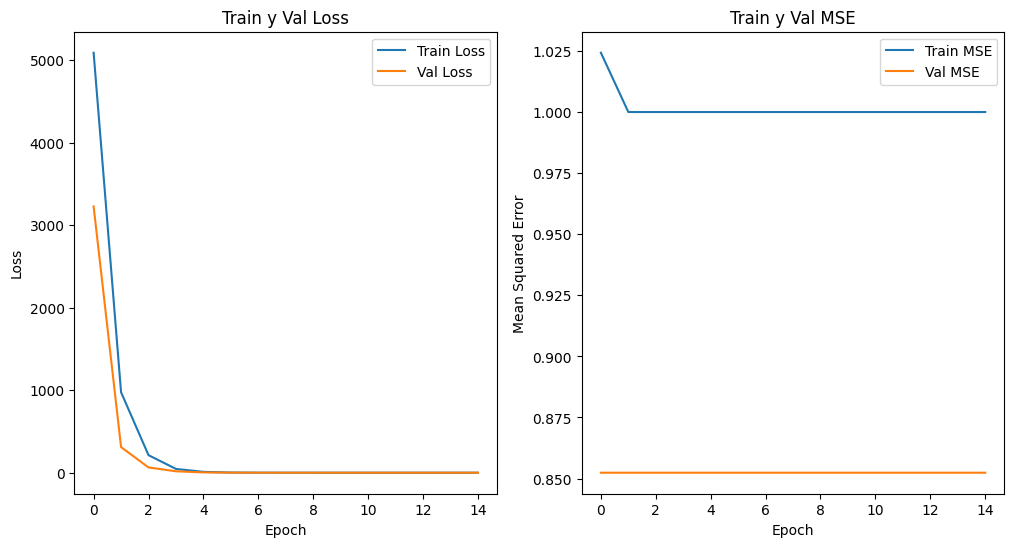

16/16 [==============================] - 13s 451ms/step - loss: 1.5042 - mean_squared_error: 1.5042
Test loss: 1.5041803121566772
Test MSE: 1.50417959690094


In [28]:
# Métricas de pérdida y MSE
loss = H.history['loss']
val_loss = H.history['val_loss']
mse = H.history['mean_squared_error']
val_mse = H.history['val_mean_squared_error']

# Gráfica de la pérdida y MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train y Val Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mse, label='Train MSE')
plt.plot(val_mse, label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Train y Val MSE')
plt.legend()

plt.show()

# Evaluación del modelo en el conjunto de prueba
loss, mse = model2.evaluate(X_test_norm, y_test_norm, verbose=1)
print('Test loss:', loss)
print('Test MSE:', mse)


## Ahora desnormalizo para ver que resultados me ha dado y para fusionar los modelos.

In [29]:
# Predecimos
train_pred_img = model2.predict(X_train_norm)
val_pred_img = model2.predict(X_val_norm)
test_pred_img = model2.predict(X_test_norm)

# Defino la media y la desviación estándar utilizadas para normalizar
train_mean = np.mean(train_pred_img, axis=0)
train_std = np.std(train_pred_img, axis=0)

# Denormalizo train_pred_img
train_pred_img_denorm = (train_pred_img * train_std) + train_mean

# Denormalizo val_pred_img
val_pred_img_denorm = (val_pred_img * train_std) + train_mean

# Denormalizo test_pred_img
test_pred_img_denorm = (test_pred_img * train_std) + train_mean

16/16 [==============================] - 2s 120ms/step


In [30]:
# Reshape para que las dimensiones sean las correctas
train_pred_img_denorm = train_pred_img_denorm.reshape(-1, 1)
val_pred_img_denorm = val_pred_img_denorm.reshape(-1, 1)
test_pred_img_denorm = test_pred_img_denorm.reshape(-1, 1)

In [31]:
train_pred_img.shape

(1808, 1)

In [32]:
y_train_norm.shape

(1808, 1)

# Aqui podemos ver la prediccion del modelo con valores coherentes.

In [33]:
# Calculo el error RMSE para cada conjunto de datos
train_img_rmse = math.sqrt(mean_squared_error(y_train, train_pred_img))
val_img_rmse = math.sqrt(mean_squared_error(y_val, val_pred_img))
test_img_rmse = math.sqrt(mean_squared_error(y_test, test_pred_img))
print(f'Train Score: {train_img_rmse:.2f} RMSE')
print(f'Validation Score: {val_img_rmse:.2f} RMSE')
print(f'Test Score: {test_img_rmse:.2f} RMSE')

Train Score: 85.67 RMSE
Validation Score: 84.61 RMSE
Test Score: 98.37 RMSE


#### Esto indica la discrepancia promedio entre los valores reales y los valores predichos en el conjunto de entrenamiento. Estos valores mide la precisión del modelo lo cual no se valores para nada buenos ya que un RMSE más bajo indica un mejor rendimiento del modelo. Aunque observandolos, tanto train como val han sido valores muy parejos y los de test aproximadamente un 15% más elevado. Es importante considerar estos valores en el contexto del problema y no son valores buenos.

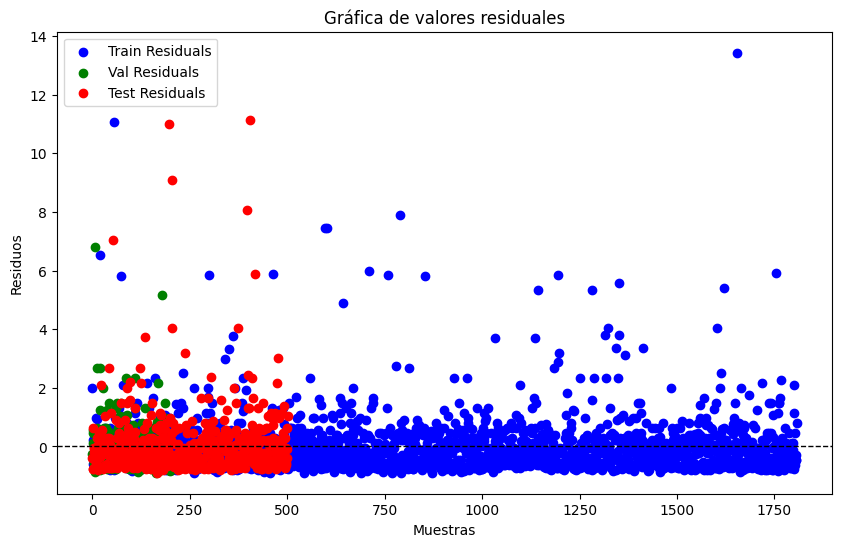

In [36]:
# Calculo los errores residuales
train_residuo = y_train_norm - train_pred_img
val_residuo = y_val_norm - val_pred_img
test_residuo = y_test_norm - test_pred_img

# Grafico
plt.figure(figsize=(10, 6))
plt.scatter(range(len(train_residuo)), train_residuo, color='blue', label='Train Residuals')
plt.scatter(range(len(val_residuo)), val_residuo, color='green', label='Val Residuals')
plt.scatter(range(len(test_residuo)), test_residuo, color='red', label='Test Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Muestras')
plt.ylabel('Residuos')
plt.title('Gráfica de valores residuales')
plt.legend()
plt.show()

### Esto sugiere que hay una discrepancia entre la pérdida calculada durante el entrenamiento y la evaluación final en el conjunto de test. Puede haber varias razones, como el sobreajuste del modelo, el uso de regularización, la configuración del optimizador, la configuración de la tasa de aprendizaje, etc.

### He realizado diferentes pruebas de configuración de las redes convolucionales creadas como pre-entrenadas y los hiperparámetros sin lograr mejores resultados. También he probado con diferentes métodos de activacion de la capa densa como es la linear y sigmoid sin lograr resultados relevantes.

### Lo cual llego a la conclusión de que se debe aumentar el conjunto de datos para intentar mejorar el resultado del modelo.



### AHORA FUSIONO LAS DOS PREDICCIONES.

In [37]:
# Defino el modelo de fusión de redes neuronales
fusion_model = Sequential()
fusion_model.add(Dense(64, activation='relu', input_shape=(2,)))
fusion_model.add(Dense(32, activation='relu'))
fusion_model.add(Dense(1))  # Capa de salida para la regresión

# Compil0 el modelo
fusion_model.compile(optimizer='adam', loss='mean_squared_error')

# Entren0 el modelo de fusión
history = fusion_model.fit(np.concatenate((train_pred, train_pred_img), axis=1), y_train_scaled, epochs=30, batch_size=128, validation_data=(np.concatenate((val_pred, val_pred_img), axis=1), y_val_scaled))

# Evaluo el modelo en el conjunto de prueba
mse = fusion_model.evaluate(np.concatenate((test_pred, test_pred_img), axis=1), y_test_scaled)
print('Mean Squared Error:', mse)

Epoch 1/30
15/15 [==============================] - 1s 14ms/step - loss: 38.4144 - val_loss: 12.8034
Epoch 2/30
15/15 [==============================] - 0s 4ms/step - loss: 4.6278 - val_loss: 3.4385
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 1.1533 - val_loss: 0.3841
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 0.2689 - val_loss: 0.0027
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 0.0987 - val_loss: 0.0816
Epoch 6/30
15/15 [==============================] - 0s 5ms/step - loss: 0.0533 - val_loss: 0.0389
Epoch 7/30
15/15 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.0026
Epoch 8/30
15/15 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 9/30
15/15 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 10/30
15/15 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 11/30
15/1

# Luego de realizar la fusión de los datos predichos, he desnormalizado los datos correspondientes a las imagenes para que todos los datos esten unicamente escalados. Considero que el MSE ha dado un valor aceptable por lo que se puede decir que las predicciones han sido muy parecidas.